**Task-1: - Perform following operations on image- Image Resizing and Image Blurring**

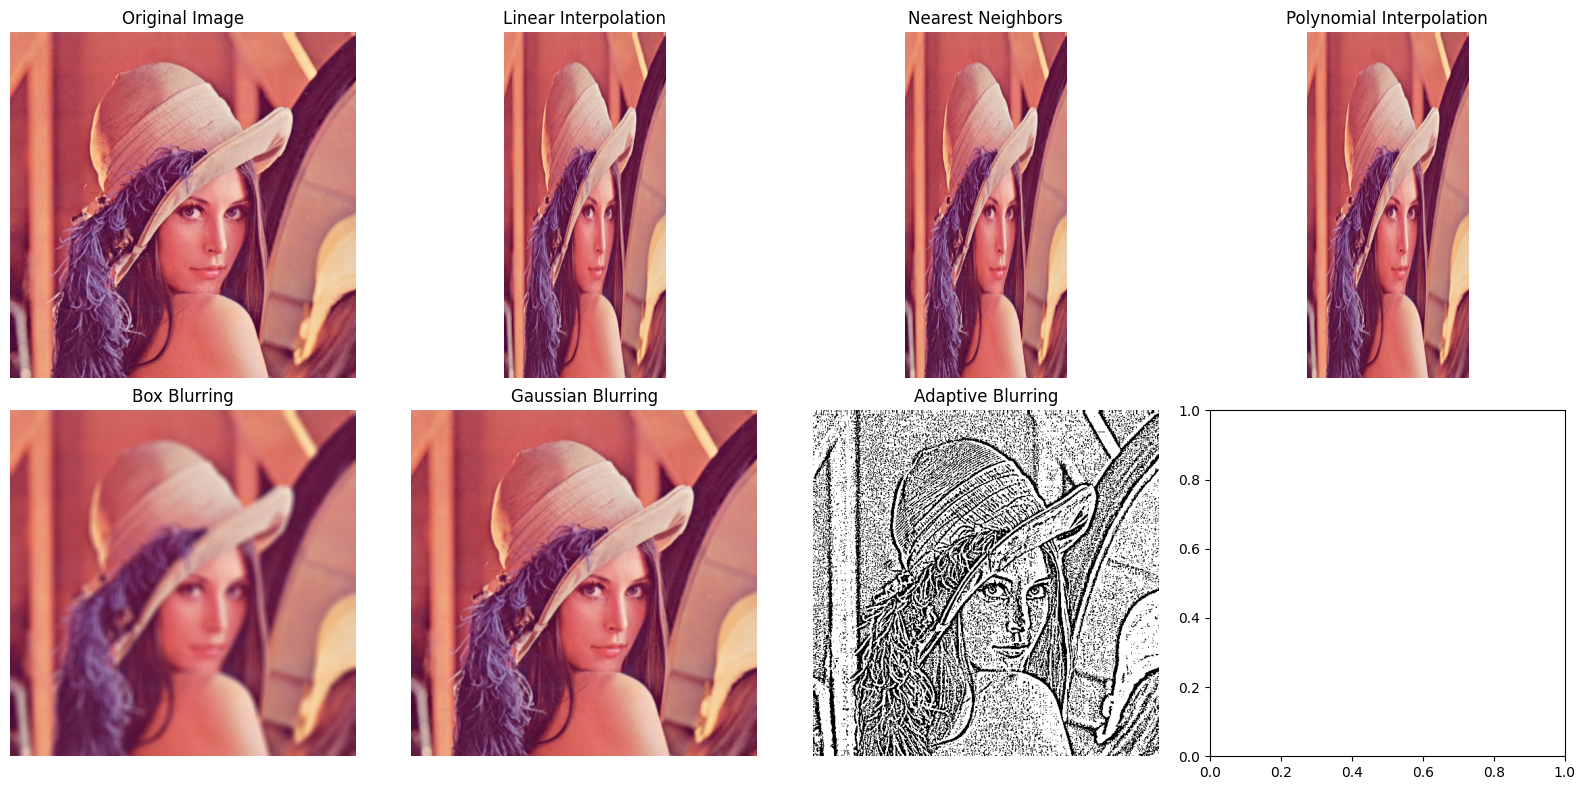

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Lab1_image.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying with matplotlib

height, width, _ = image.shape

scale_x = 0.7
scale_y = 1.5

new_width = int(width * scale_x)
new_height = int(height * scale_y)

resized_linear = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
resized_nearest = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_NEAREST)
resized_polynomial = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

box_blur = cv2.blur(image, (10, 10))
gaussian_blur = cv2.GaussianBlur(image, (3, 3), 0)

# 1.2.3 Adaptive Blurring (using a Gaussian kernel)
# Convert the image to grayscale before applying adaptive thresholding
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
adaptive_blur = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Plotting the images
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Original image plot
axes[0, 0].imshow(image)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Linear interpolation plot
axes[0, 1].imshow(resized_linear)
axes[0, 1].set_title('Linear Interpolation')
axes[0, 1].axis('off')

# Nearest Neighbors plot
axes[0, 2].imshow(resized_nearest)
axes[0, 2].set_title('Nearest Neighbors')
axes[0, 2].axis('off')

# Polynomial (Cubic) interpolation plot
axes[0, 3].imshow(resized_polynomial)
axes[0, 3].set_title('Polynomial Interpolation')
axes[0, 3].axis('off')

# Box Blurring plot
axes[1, 0].imshow(box_blur)
axes[1, 0].set_title('Box Blurring')
axes[1, 0].axis('off')

# Gaussian Blurring plot
axes[1, 1].imshow(gaussian_blur)
axes[1, 1].set_title('Gaussian Blurring')
axes[1, 1].axis('off')

# Adaptive Blurring plot
axes[1, 2].imshow(adaptive_blur, cmap='gray')
axes[1, 2].set_title('Adaptive Blurring')
axes[1, 2].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


**Task-2: - Apply Machine Learning Algorithm and find the model accuracy based on K fold Cross Validation with (80-20 train-test split).**

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [5]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

In [3]:
X = X / 255.0

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
y_train_binary = label_binarize(y_train, classes=list(range(10)))
y_test_binary = label_binarize(y_test, classes=list(range(10)))

Evaluating Random Forest...
Evaluating ANN...


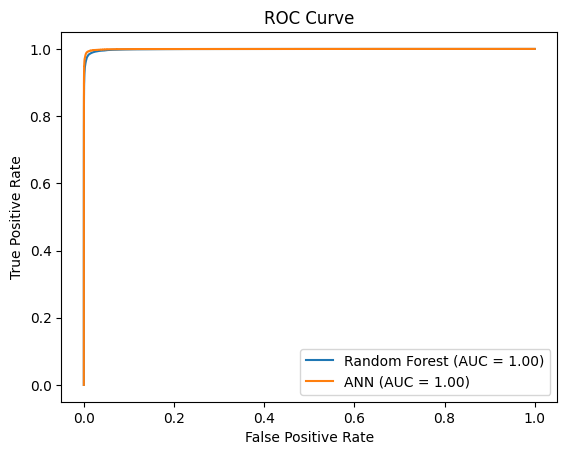


Model: Random Forest
Accuracy: 0.9672
Precision: 0.9672
Recall: 0.9672
F1-Score: 0.9672
ROC AUC: 0.9989
Confusion Matrix:
[[1320    0    5    1    2    2    4    1    8    0]
 [   0 1577    7    6    2    1    0    5    2    0]
 [   6    3 1332    4    5    2    9    7   10    2]
 [   1    1   22 1358    0   12    3   12   14   10]
 [   2    0    4    0 1249    0    4    3    2   31]
 [   4    3    2   19    2 1219    7    1   13    3]
 [   3    2    1    0    7    9 1370    0    4    0]
 [   3    5   19    0    6    1    0 1444    6   19]
 [   1    7    9   15    5   11    5    4 1293    7]
 [   6    6    3   17   19    3    1   12    8 1345]]

Model: ANN
Accuracy: 0.9774
Precision: 0.9774
Recall: 0.9774
F1-Score: 0.9774
ROC AUC: 0.9995
Confusion Matrix:
[[1323    1    3    1    0    3    5    1    6    0]
 [   0 1578    6    4    2    1    2    4    3    0]
 [   2    7 1349    2    2    2    4    5    5    2]
 [   2    0   15 1390    0    9    0    7    3    7]
 [   2    1    2    0

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "ANN": MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=100, random_state=42)
}

results = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    accuracies, precisions, recalls, f1s = [], [], [], []
    
    for train_idx, val_idx in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model.fit(X_train_fold, y_train_fold)
        
        y_pred = model.predict(X_val_fold)
        
        accuracies.append(accuracy_score(y_val_fold, y_pred))
        precisions.append(precision_score(y_val_fold, y_pred, average='weighted'))
        recalls.append(recall_score(y_val_fold, y_pred, average='weighted'))
        f1s.append(f1_score(y_val_fold, y_pred, average='weighted'))
    
    results[model_name] = {
        "Accuracy": np.mean(accuracies),
        "Precision": np.mean(precisions),
        "Recall": np.mean(recalls),
        "F1-Score": np.mean(f1s),
    }
    
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    results[model_name]["Confusion Matrix"] = cm
    
    y_test_prob = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_binary.ravel(), y_test_prob.ravel())
    roc_auc = auc(fpr, tpr)
    results[model_name]["ROC AUC"] = roc_auc
    
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Display results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        if metric != "Confusion Matrix":
            print(f"{metric}: {value:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")